# 회귀 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##  경사하강법

### (1) 수치 미분법 

#### 중심 차분법

In [2]:
def numerical_derivative(func, x):
    delta = 1E-4 # 0.0001       # 1.0* 10의-4승
    return (func(x+delta) - func(x-delta)) / (2*delta)

In [3]:
def func1(x):
    return x**2

In [4]:
numerical_derivative(func1, 2.0)

4.000000000004

In [5]:
for i in range(0,11):
    print(i, ':', numerical_derivative(func1, float(i)))

0 : 0.0
1 : 1.9999999999992246
2 : 4.000000000004
3 : 6.000000000012662
4 : 7.999999999999119
5 : 9.999999999976694
6 : 11.999999999972033
7 : 13.999999999967372
8 : 15.999999999927184
9 : 17.99999999995805
10 : 19.99999999995339


### 다중 변수 미분 계수 구하기
수치 미분법에 의한 

In [6]:
# def numerical_derivative(f, a): #f:다변수 함수, a:모든 변수값을 포함하고 있는 1차원 numpy배열
#     delta = 1E-4
    
#     grad = np.zeors_like(a) # 각 변수마다, 계산된 수치 미분계수 값
    
#     for idx in range(len(a)):
        
#         tmp_val = a[idx]  #임시보관
#         a[idx] = tmp_val + delta
#         fx1 = f(a)      # f(x+delta, y) 계산
        
#         a[idx] = tmp_val - delta
#         fx2 = f(a)      # f(x-delta, y) 계산        
#         grad[idx] = (fx1-fx2) / (2+delta)
        
#         a[idx] = tmp_val
#     else:
#         return grad


def numerical_derivative(f, a): #f:다변수 함수, 
    import numpy as np  #a:모든 변수값을 포함하고 있는 1차원 numpy배열
    delta = 1E-4
    
    grad = np.zeros_like(a) # 각 변수마다, 계산된 수치 미분계수 값
    
    for idx in range(len(a)):
        
        tmp_val = a[idx]  #임시보관
        a[idx] = tmp_val + delta
        fx1 = f(a)      # f(x+delta, y) 계산
        
        a[idx] = tmp_val - delta
        fx2 = f(a)      # f(x-delta, y) 계산        
        grad[idx] = (fx1-fx2) /(2*delta)
        
        a[idx] = tmp_val
    else:
        return grad

In [7]:
def MSE(p):  # p : array([W,b])
    global x, y
    y_pred =  x*p[0]+p[1]
    return  np.mean((y-y_pred)**2)

In [8]:
def predict(x, p): # p : array([W,b])
    return x * p[0]+p[1]

In [9]:
def drawGraphs(x, y, W, b, W_history, b_history):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    axes[0].plot(W_history, 'b-', b_history, 'r--')

    xx = np.linspace(x.min()-1,x.max()+1, 100)
    yy = W*xx + b
    axes[1].scatter(x, y)
    axes[1].plot(xx, yy, c='r')
    plt.show()   

In [10]:
def numericalderiv_LinearRegression(x, y, lr=0.01, max_iters=1000):
    import random

    W =float(random.randint(-10, 10))
    b =float(random.randint(-10, 10))


    W_history =  [W]
    b_history =  [b]

    cost =  MSE(np.array([W,b]))
    print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

    rate =   lr # Learning rate
    MaxItrs = max_iters

    for epoch in range(1,MaxItrs+1):  #epoch: 반복 횟수
        gradientW, gradientB  =  numerical_derivative(MSE, np.array([W, b]))
        W =  W - rate * gradientW      #Grad descent 경사하강법
        b =  b - rate * gradientB       #Grad descent   경사하강법
        W_history.append(W)
        b_history.append(b)

        cost =  MSE(np.array([W,b]))

        if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
            print('Epochs:', epoch, 
                  'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
                  end=' ')
            print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 
            
    else:
        print('W=', W, 'b=', b)
        print('참값:', y)
        print('예측:', predict(x, np.array([W,b])))
        drawGraphs(x, y, W,b, W_history, b_history)
        return W, b

Epochs: 0 	W: -6.0 	b: -9.0 	cost: 296.0
Epochs: 1 gradient W: -56.00, gradient b:-20.00,  W:-5.44, b:-8.80, cost: 261.93
Epochs: 2 gradient W: -51.52, gradient b:-19.60,  W:-4.92, b:-8.60, cost: 232.65
Epochs: 3 gradient W: -47.40, gradient b:-19.21,  W:-4.45, b:-8.41, cost: 207.43
Epochs: 4 gradient W: -43.61, gradient b:-18.82,  W:-4.01, b:-8.22, cost: 185.67
Epochs: 5 gradient W: -40.12, gradient b:-18.45,  W:-3.61, b:-8.04, cost: 166.85
Epochs: 6 gradient W: -36.91, gradient b:-18.08,  W:-3.24, b:-7.86, cost: 150.53
Epochs: 7 gradient W: -33.96, gradient b:-17.72,  W:-2.90, b:-7.68, cost: 136.36
Epochs: 8 gradient W: -31.24, gradient b:-17.36,  W:-2.59, b:-7.51, cost: 124.00
Epochs: 9 gradient W: -28.74, gradient b:-17.02,  W:-2.31, b:-7.34, cost: 113.21
Epochs: 100 gradient W: -0.01, gradient b:-2.71,  W:1.00, b:-0.33, cost: 1.76
Epochs: 200 gradient W: -0.00, gradient b:-0.36,  W:1.00, b:0.82, cost: 0.03
Epochs: 300 gradient W: -0.00, gradient b:-0.05,  W:1.00, b:0.98, cost: 0.0

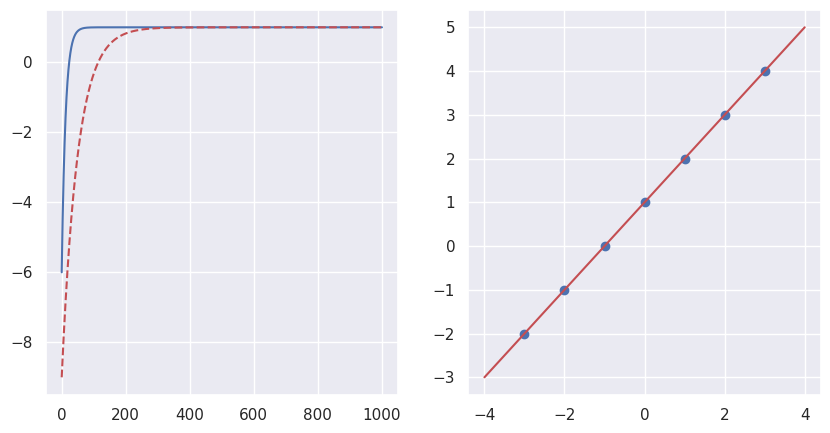

In [15]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3] )
y = np.array([-2, -1, 0, 1, 2, 3, 4] )
W, b = numericalderiv_LinearRegression(x, y)

Epochs: 0 	W: -1.0 	b: 6.0 	cost: 16.215714285714288
Epochs: 1 gradient W: -15.69, gradient b:1.80,  W:-0.84, b:5.98, cost: 13.82
Epochs: 2 gradient W: -14.43, gradient b:1.76,  W:-0.70, b:5.96, cost: 11.79
Epochs: 3 gradient W: -13.28, gradient b:1.73,  W:-0.57, b:5.95, cost: 10.07
Epochs: 4 gradient W: -12.21, gradient b:1.69,  W:-0.44, b:5.93, cost: 8.61
Epochs: 5 gradient W: -11.24, gradient b:1.66,  W:-0.33, b:5.91, cost: 7.37
Epochs: 6 gradient W: -10.34, gradient b:1.63,  W:-0.23, b:5.90, cost: 6.32
Epochs: 7 gradient W: -9.51, gradient b:1.59,  W:-0.13, b:5.88, cost: 5.42
Epochs: 8 gradient W: -8.75, gradient b:1.56,  W:-0.05, b:5.87, cost: 4.66
Epochs: 9 gradient W: -8.05, gradient b:1.53,  W:0.03, b:5.85, cost: 4.02
Epochs: 100 gradient W: -0.00, gradient b:0.24,  W:0.96, b:5.22, cost: 0.04
Epochs: 200 gradient W: -0.00, gradient b:0.03,  W:0.96, b:5.12, cost: 0.03
Epochs: 300 gradient W: -0.00, gradient b:0.00,  W:0.96, b:5.10, cost: 0.03
Epochs: 400 gradient W: 0.00, gradie

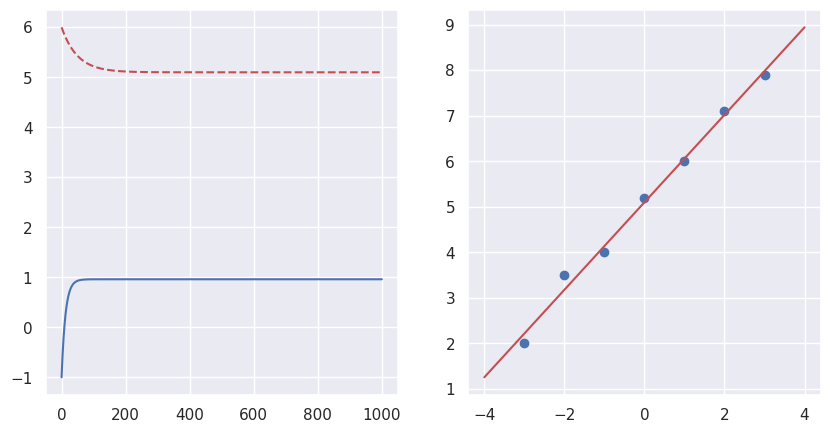

In [14]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3]  )
y = np.array( [2, 3.5, 4, 5.2, 6, 7.1, 7.9] )
W, b = numericalderiv_LinearRegression(x,y)

In [ ]:
미분법의 기본공식
1. f(x)=c (단, c는 상수) 이면 f`(x)=0
2. f(x) = xn승 (단, nd는 자연수 이면
                f`(x) = nx ** (n-1)

### (2) 해석적 미분법

### Python으로 미분식 구하는 방법

In [16]:
from sympy import symbols, Derivative       #Derivative 가 미분임

In [17]:
x = symbols('x')    # 함수에 사용될 변수를 심볼화
fx = 3*x**2 -4*x +1    # 함수식

In [18]:
Derivative(fx, x).doit() # x에 대한 도함수 구하기

6*x - 4

In [19]:
d= Derivative(fx,x).doit()

In [21]:
# MSE 편미분하기
n, x, W, b, y = symbols('n, x, W, b, y')    # 함수에 사용될 변수를 심볼화
fx = (y - W *x -b) **2                       # MSE 함수식

In [22]:
Derivative(fx, W).doit() # W에 대한 편미분식 구하기

-2*x*(-W*x - b + y)

In [23]:
Derivative(fx, b).doit() # b에 대한 편미분식 구하기

2*W*x + 2*b - 2*y

In [24]:
del W, b, y, x, n   #symbol을 변수로 사용하기 위해 지움
### 함수식을 정의하기 위해 symbol로 정해진 name은 변수로 사용될 수 없기때문

### 해석적 방법에 의한 회귀 분석

In [26]:
#gradient descent 구현하기

# y = xW + b
#Gradient
def gradient(x, y, w, b):
    return np.mean(-2*x*(-w*x -b +y)) , np.mean(2*(w*x + b -y) )# gradient W, gradient b

In [30]:
def analytical_LinearRegression(x, y, lr=0.01, max_iters=1000):
    import random

    W =float(random.randint(-10, 10))
    b =float(random.randint(-10, 10))


    W_history =  [W]
    b_history = [b]

    cost =  MSE(np.array([W, b]))
    print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

    rate =   lr # Learning rate
    MaxItrs = max_iters

    for epoch in range(1,MaxItrs+1):  #epoch: 반복 횟수
        gradientW, gradientB  =  gradient(x, y, W, b)
        W =  W - rate * gradientW       #Grad descent
        b =  b - rate * gradientB       #Grad descent
        W_history.append(W)
        b_history.append(b)

        cost =  MSE(np.array([W, b]))

        if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
            print('Epochs:', epoch, 
                  'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
                  end=' ')
            print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 
            
    else:
        print('W=', W, 'b=', b)
        print('참값:', y)
        print('예측:', predict(x, np.array([W,b])))
        drawGraphs(x, y, W,b, W_history, b_history)
        return W, b

Epochs: 0 	W: -3.0 	b: 6.0 	cost: 89.0
Epochs: 1 gradient W: -32.00, gradient b:10.00,  W:-2.68, b:5.90, cost: 78.18
Epochs: 2 gradient W: -29.44, gradient b:9.80,  W:-2.39, b:5.80, cost: 68.91
Epochs: 3 gradient W: -27.08, gradient b:9.60,  W:-2.11, b:5.71, cost: 60.95
Epochs: 4 gradient W: -24.92, gradient b:9.41,  W:-1.87, b:5.61, cost: 54.12
Epochs: 5 gradient W: -22.92, gradient b:9.22,  W:-1.64, b:5.52, cost: 48.23
Epochs: 6 gradient W: -21.09, gradient b:9.04,  W:-1.43, b:5.43, cost: 43.15
Epochs: 7 gradient W: -19.40, gradient b:8.86,  W:-1.23, b:5.34, cost: 38.76
Epochs: 8 gradient W: -17.85, gradient b:8.68,  W:-1.05, b:5.25, cost: 34.95
Epochs: 9 gradient W: -16.42, gradient b:8.51,  W:-0.89, b:5.17, cost: 31.65
Epochs: 100 gradient W: -0.01, gradient b:1.35,  W:1.00, b:1.66, cost: 0.44
Epochs: 200 gradient W: -0.00, gradient b:0.18,  W:1.00, b:1.09, cost: 0.01
Epochs: 300 gradient W: -0.00, gradient b:0.02,  W:1.00, b:1.01, cost: 0.00
Epochs: 400 gradient W: -0.00, gradient

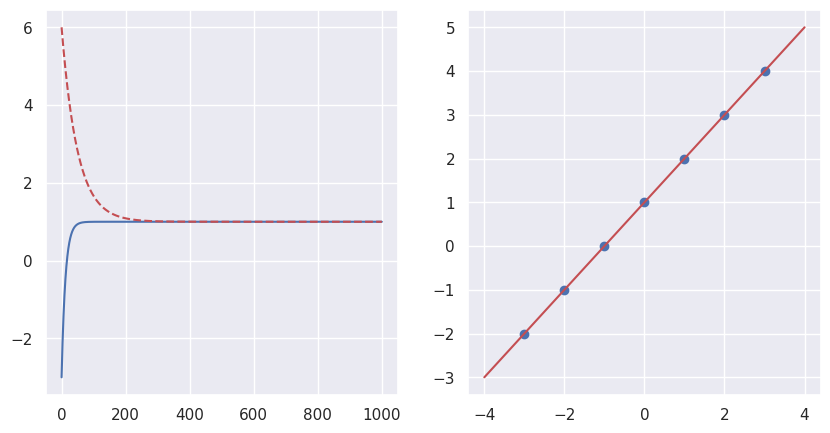

In [32]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3] )
y = np.array( [-2, -1, 0, 1, 2, 3, 4])
W, b = analytical_LinearRegression(x, y, lr= 0.01, max_iters=1000)

Epochs: 0 	W: 8.0 	b: 6.0 	cost: 199.0442857142857
Epochs: 1 gradient W: 56.31, gradient b:1.80,  W:7.44, b:5.98, cost: 168.57
Epochs: 2 gradient W: 51.81, gradient b:1.76,  W:6.92, b:5.96, cost: 142.77
Epochs: 3 gradient W: 47.66, gradient b:1.73,  W:6.44, b:5.95, cost: 120.93
Epochs: 4 gradient W: 43.85, gradient b:1.69,  W:6.00, b:5.93, cost: 102.44
Epochs: 5 gradient W: 40.34, gradient b:1.66,  W:5.60, b:5.91, cost: 86.79
Epochs: 6 gradient W: 37.12, gradient b:1.63,  W:5.23, b:5.90, cost: 73.54
Epochs: 7 gradient W: 34.15, gradient b:1.59,  W:4.89, b:5.88, cost: 62.32
Epochs: 8 gradient W: 31.41, gradient b:1.56,  W:4.57, b:5.87, cost: 52.82
Epochs: 9 gradient W: 28.90, gradient b:1.53,  W:4.28, b:5.85, cost: 44.78
Epochs: 100 gradient W: 0.01, gradient b:0.24,  W:0.96, b:5.22, cost: 0.04
Epochs: 200 gradient W: 0.00, gradient b:0.03,  W:0.96, b:5.12, cost: 0.03
Epochs: 300 gradient W: 0.00, gradient b:0.00,  W:0.96, b:5.10, cost: 0.03
Epochs: 400 gradient W: 0.00, gradient b:0.00

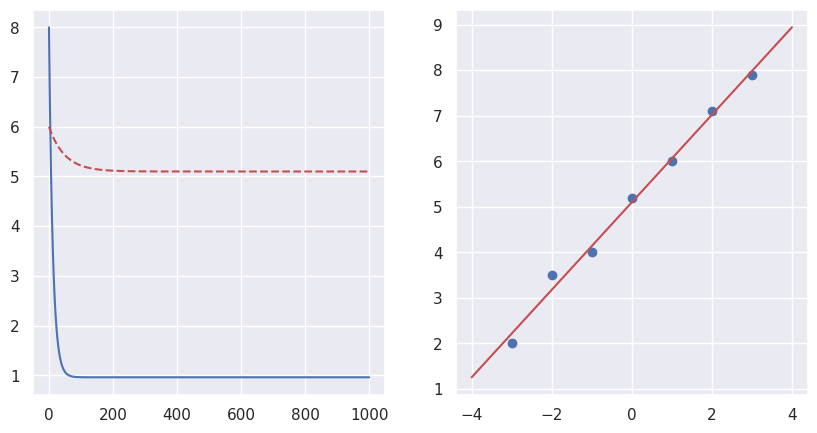

In [34]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3]  )
y = np.array( [2, 3.5, 4, 5.2, 6, 7.1, 7.9] )
W, b = analytical_LinearRegression(x, y)

## 랜덤 자료에 대한 단순 선형 회귀 분석

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
[ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947
  5.17

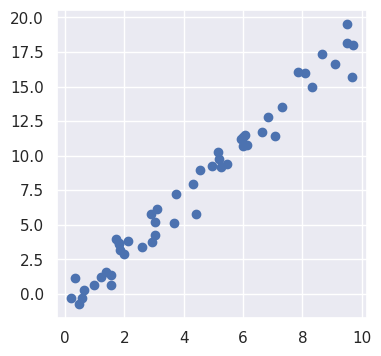

In [39]:
rng = np.random.RandomState(42) #객체화 42는 seed
x = 10 * rng.rand(50)
y = 2*x -1 + rng.randn(50)
print(x)
print(y)
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

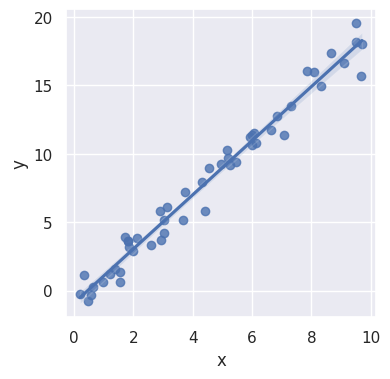

In [37]:
df=pd.DataFrame()
df['x']= x
df['y']= y

plt.figure(figsize=(4,4))
sns.regplot(x='x', y='y', data=df)
plt.show()

Epochs: 0 	W: 6.0 	b: -8.0 	cost: 250.64758553469264
Epochs: 1 gradient W: 162.47, gradient b:21.68,  W:4.38, b:-8.22, cost: 59.25
Epochs: 2 gradient W: 69.35, gradient b:6.76,  W:3.68, b:-8.28, cost: 24.62
Epochs: 3 gradient W: 29.82, gradient b:0.44,  W:3.38, b:-8.29, cost: 18.23
Epochs: 4 gradient W: 13.05, gradient b:-2.23,  W:3.25, b:-8.27, cost: 16.94
Epochs: 5 gradient W: 5.92, gradient b:-3.35,  W:3.19, b:-8.23, cost: 16.55
Epochs: 6 gradient W: 2.90, gradient b:-3.81,  W:3.16, b:-8.19, cost: 16.34
Epochs: 7 gradient W: 1.61, gradient b:-3.99,  W:3.15, b:-8.15, cost: 16.16
Epochs: 8 gradient W: 1.06, gradient b:-4.06,  W:3.14, b:-8.11, cost: 15.98
Epochs: 9 gradient W: 0.83, gradient b:-4.07,  W:3.13, b:-8.07, cost: 15.81
Epochs: 100 gradient W: 0.39, gradient b:-2.44,  W:2.66, b:-5.17, cost: 6.13
Epochs: 200 gradient W: 0.22, gradient b:-1.38,  W:2.37, b:-3.32, cost: 2.52
Epochs: 300 gradient W: 0.13, gradient b:-0.78,  W:2.20, b:-2.27, cost: 1.37
Epochs: 400 gradient W: 0.07,

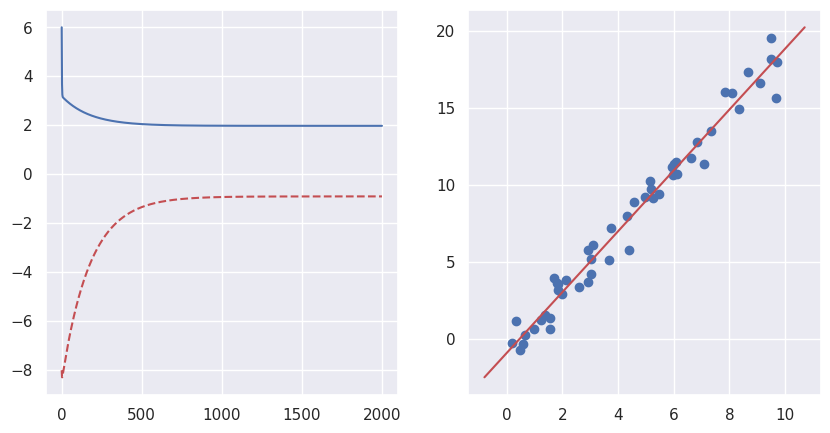

In [40]:
W, b = numericalderiv_LinearRegression(x,y, lr=0.01, max_iters=2000)

### Scikit Learn 활용
데이터를 특징과 대상 벡터로 배치

In [44]:
# 기계학습
x = x.reshape(-1,1)
print(x.shape)    
print(y.shape) 

# scikit-learn의 입력은 feature x값을 한 행씩으로 입력
# y는 1차원
print(x)

(50, 1)
(50,)
[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]]
[ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.131

In [45]:
from sklearn.linear_model import LinearRegression       #모델 클래스
model = LinearRegression (fit_intercept=True)           # y 절편 있음
model.fit(x,y)


LinearRegression()

In [46]:
print('기울기:', model.coef_)
print('y절편:', model.intercept_)

기울기: [1.9776566]
y절편: -0.9033107255311146


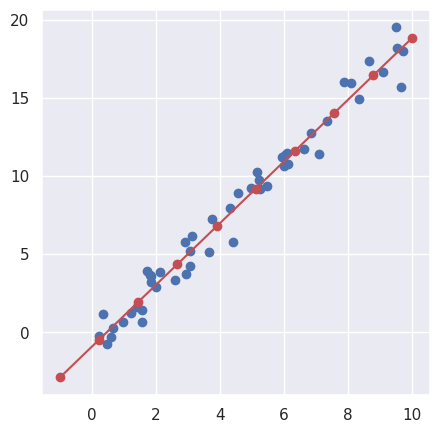

In [48]:
xx =  np.linspace(-1,10,10)
yy =  model.predict(xx.reshape(-1,1))

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xx, yy, c='r', marker='o')
plt.show()

## 다중 선형 회귀 분석

In [49]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ICTIS_2023/data/boston_house_price.csv", 
                 index_col= 0)


Mounted at /content/drive


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [51]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [54]:
#상관관계 분석
df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [55]:
# 다중회귀 자료 준비
x = df.copy()
y = x.pop('MEDV')

In [56]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [57]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [59]:
# 모델 인스턴스화 및 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [60]:
print('계수:', model.coef_)
print('y절편:', model.intercept_)

계수: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
y절편: 36.459488385089955


In [61]:
y_pred = model.predict(x)

In [69]:
from sklearn.metrics import mean_squared_error
print('score=', model.score(x , y))
print('MSE=', mean_squared_error(df['MEDV'], y_pred ))

score= 0.7406426641094095
MSE= 21.894831181729202


In [72]:
boston_house_regression(df, ['NOX'], 'MEDV')

NameError: ignored

# Logistic Regression
방정식으로 푸는거
- 적용분야:
  - 종속변수가 예/아니오, 1/0, 합격/불합격, 구매/비구매 같은 범주형(categorial)으로 표현되는 경우
- 분류모델임
- 회귀식 형태: 로지스틱(logistic, =시그모이드, sigmoid) 함수

2) 로지스틱 회귀 분석
선형회귀 -> Sigmoid

경사 하강에 의한 로지스틱 회귀 분석 방법
연습시간 결과

10
7
3

cross entropy
 - 출력 결과 y는 0 혹은 1이므로 MSE 와 다른 손실 함수 필요
 - sigmoid는 확률

Sigmoid 함수
```
 def sigmoid(z):
    e= 1E-7
    return np.exp(z) / 1+np.exp(z)+e)
```




## iris 종 분류 사례

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame= True)
df = iris.frame
df.info()

In [ ]:
sdf = pd.DataFrame()
sdf['petal_length'] = df['petal length (cm)']
sdf['species'] = df['target']
sdf = 

In [ ]:
sns.pairplot(data=sdf, vars=['petal_length', 'species'], hue='species')
plt.show()

In [ ]:
sns. (x='petal_length', y='species', data=sdf, logistic= )
plt.show()

In [ ]:
# 학습 데이터, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( , 
                                                     , 
                                                    test_size=0.33)

x_train.shape, y_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression


print('계수:', model.coef_)
print('y절편:', model.intercept_)

In [ ]:
def sigmoid(z):
    

In [ ]:
xx = np.linspace(1,sl_df['petal_length'].max(),1000)
z = 
yy = 

In [ ]:
plt.scatter(sl_df['petal_length'], sl_df['species'])
plt.plot(xx, yy, 'r')
plt.xlim(sdf['petal_length'].min()-0.1, sdf['petal_length'].max()+0.1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(  ,    ))

In [ ]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(  , annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show()

In [ ]:
dispConfusionMatrix( ,  )

In [ ]:
print(classification_report(  ))

In [ ]:
print(confusion_matrix(y_test, ))

In [ ]:
dispConfusionMatrix(y_test, )

In [ ]:
print(classification_report(y_test, ))